In [2]:
pip install yfinance arch pandas matplotlib numpy

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.stattools import adfuller

In [4]:
# Download stock data
symbol = 'AAPL'
start = '2015-01-01'
end = '2023-01-01'
data = yf.download(symbol, start=start, end=end)

data['Returns'] = data['Close'].pct_change().dropna()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
data=data.dropna()

In [6]:
data

Price,Close,High,Low,Open,Volume,Returns
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2015-01-05,23.635290,24.169170,23.448433,24.089088,257142000,-0.028172
2015-01-06,23.637512,23.897778,23.274918,23.699798,263188400,0.000094
2015-01-07,23.968962,24.069063,23.735389,23.846614,160423600,0.014022
2015-01-08,24.889902,24.947740,24.180287,24.298187,237458000,0.038422
2015-01-09,24.916599,25.192437,24.516189,25.063415,214798000,0.001073
...,...,...,...,...,...,...
2022-12-23,130.344482,130.898044,128.149997,129.415284,63814900,-0.002798
2022-12-27,128.535538,129.899682,127.240596,129.870028,69007800,-0.013878


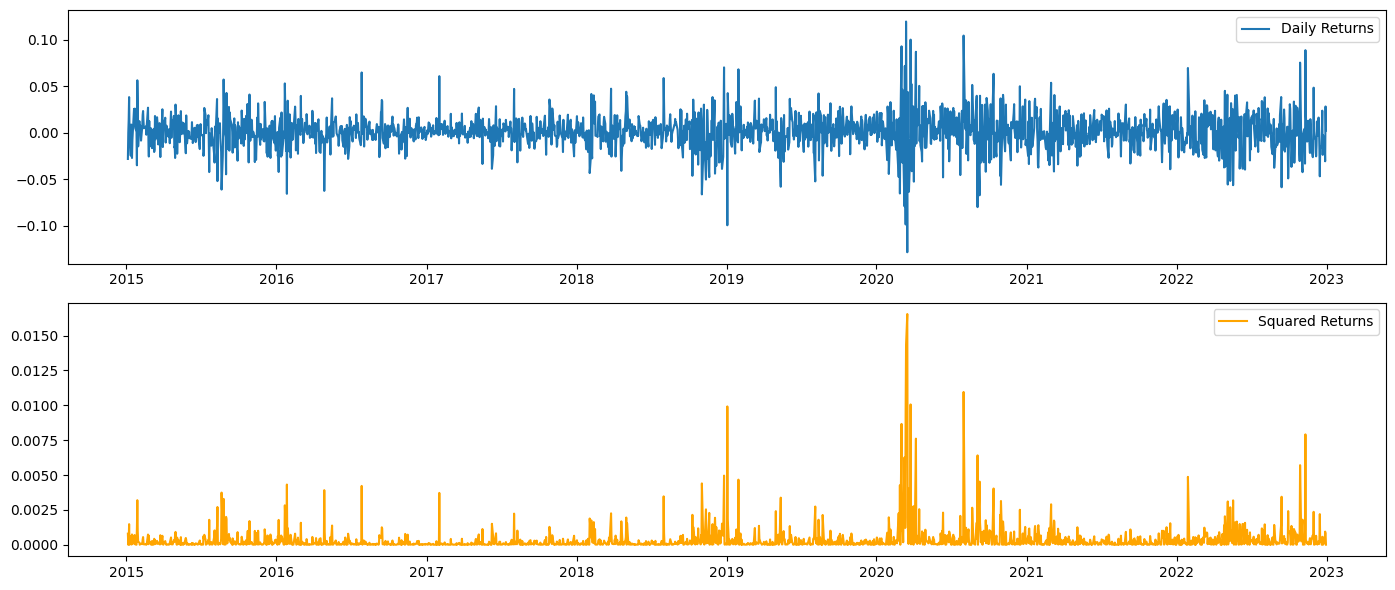

In [7]:
# Plot returns and squared returns
plt.figure(figsize=(14, 6))
plt.subplot(211)
plt.plot(data['Returns'], label='Daily Returns')
plt.legend()
plt.subplot(212)
plt.plot(data['Returns']**2, label='Squared Returns', color='orange')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# Augmented Dickey-Fuller test
adf_result = adfuller(data['Returns'].dropna())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -13.941592564488591
p-value: 4.8806180578303636e-26


In [55]:
split_ratio = 0.7
split_index = int(len(data) * split_ratio)
train = data['Returns'].iloc[:split_index]
test = data['Returns'].iloc[split_index:]

In [56]:
test

,Returns
Date,
2020-08-10,0.014535
2020-08-11,-0.029740
2020-08-12,0.033234
2020-08-13,0.017698
2020-08-14,-0.000891
...,...
2022-12-23,-0.002798
2022-12-27,-0.013878
2022-12-28,-0.030685


In [10]:
print(f"Train size: {len(train)}, Test size: {len(test)}")

Train size: 1409, Test size: 604


In [54]:
print(f"NaNs in train: {train.isnull().sum()}")
print(f"Infs in train: {np.isinf(train).sum()}")

NaNs in train: 0
Infs in train: 0


In [12]:
from arch import arch_model
import pandas as pd

# Define candidate (p, q) combinations
candidates = [(1,1), (1,2), (2,1), (2,2)]
results = []

# Fit models and store results
for p, q in candidates:
    model = arch_model(train, mean='Constant', vol='GARCH', p=p, q=q)
    model_fit = model.fit(update_freq=0, disp='off')  # Silence output
    results.append({
        'p': p,
        'q': q,
        'AIC': model_fit.aic,
        'BIC': model_fit.bic,
    })

# Create results DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values('AIC'))

   p  q          AIC          BIC
2  2  1 -7670.128569 -7643.875392
3  2  2 -7667.919664 -7636.415851
0  1  1 -7664.918832 -7643.916290
1  1  2 -7664.161771 -7637.908593


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003298. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003298. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarn

In [42]:
model = arch_model(train, mean='Constant', vol='GARCH', p=1, q=1, dist='StudentsT')
model_fit = model.fit(update_freq=5)
print(model_fit.summary())

Iteration:      5,   Func. Count:     66,   Neg. LLF: 36466.563148278976
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3910.6999688484866
            Iterations: 10
            Function evaluations: 101
            Gradient evaluations: 7
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                      Returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                3910.70
Distribution:      Standardized Student's t   AIC:                          -7811.40
Method:                  Maximum Likelihood   BIC:                          -7785.15
                                              No. Observations:                 1409
Date:                      Wed, Apr 23 2025   Df Residuals:                     1408
Time:                              1

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003298. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


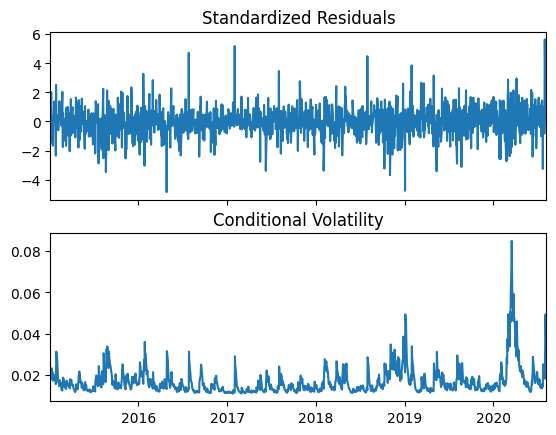

In [43]:
model_fit.plot()
plt.show()

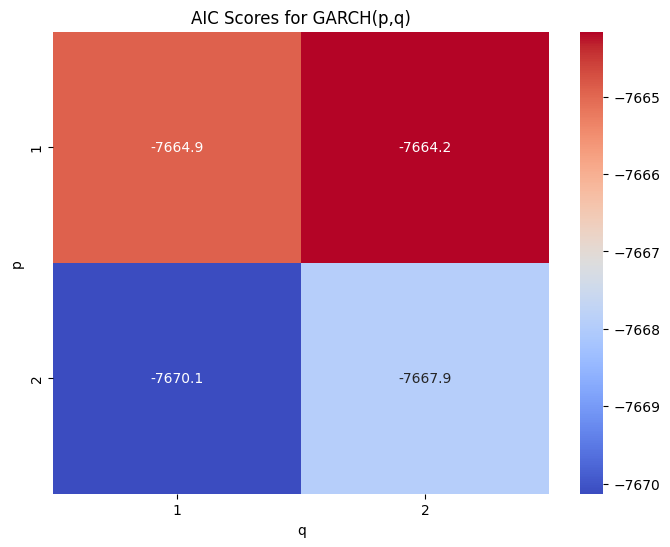

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grid of AIC/BIC values
heatmap_data = results_df.pivot(index='p', columns='q', values='AIC')
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("AIC Scores for GARCH(p,q)")
plt.show()

In [45]:
print(split_index)

1409


In [46]:
start_date = train.index[-1]
forecasts = model_fit.forecast(start=start_date, horizon=len(test), reindex=False)
forecast_var = forecasts.variance.iloc[-len(test):]

In [47]:
start_date

Timestamp('2020-08-07 00:00:00')

In [52]:
forecast_var.values

array([[0.00080098, 0.00075581, 0.00071515, 0.00067854, 0.00064558,
        0.00061592, 0.00058921, 0.00056516, 0.00054351, 0.00052402,
        0.00050648, 0.00049069, 0.00047647, 0.00046367, 0.00045214,
        0.00044177, 0.00043243, 0.00042402, 0.00041645, 0.00040964,
        0.0004035 , 0.00039798, 0.00039301, 0.00038853, 0.0003845 ,
        0.00038087, 0.00037761, 0.00037467, 0.00037202, 0.00036964,
        0.00036749, 0.00036556, 0.00036382, 0.00036226, 0.00036085,
        0.00035958, 0.00035844, 0.00035741, 0.00035648, 0.00035565,
        0.0003549 , 0.00035422, 0.00035362, 0.00035307, 0.00035258,
        0.00035213, 0.00035173, 0.00035137, 0.00035105, 0.00035076,
        0.0003505 , 0.00035026, 0.00035005, 0.00034986, 0.00034968,
        0.00034953, 0.00034939, 0.00034926, 0.00034915, 0.00034905,
        0.00034896, 0.00034887, 0.0003488 , 0.00034873, 0.00034867,
        0.00034862, 0.00034857, 0.00034852, 0.00034849, 0.00034845,
        0.00034842, 0.00034839, 0.00034836, 0.00

In [57]:
forecast_var_df = forecast_var.T


In [58]:
forecast_var_df.set_index(test.index)

Date,2020-08-07
Date,
2020-08-10,0.000801
2020-08-11,0.000756
2020-08-12,0.000715
2020-08-13,0.000679
2020-08-14,0.000646
...,...
2022-12-23,0.000348
2022-12-27,0.000348
2022-12-28,0.000348


In [59]:
forecast_volatility = np.sqrt(forecast_var_df)

In [53]:
test_squared_returns = test**2
test_squared_returns

,Returns
Date,
2020-08-10,2.112565e-04
2020-08-11,8.844601e-04
2020-08-12,1.104525e-03
2020-08-13,3.132074e-04
2020-08-14,7.944870e-07
...,...
2022-12-23,7.829914e-06
2022-12-27,1.926040e-04
2022-12-28,9.415883e-04


In [24]:
test

,Returns
Date,
2020-08-10,0.014535
2020-08-11,-0.029740
2020-08-12,0.033234
2020-08-13,0.017698
2020-08-14,-0.000891
...,...
2022-12-23,-0.002798
2022-12-27,-0.013878
2022-12-28,-0.030685


In [37]:
(forecast_var_df.values)

array([[0.00678091],
       [0.00793039],
       [0.01062473],
       [0.01284751],
       [0.01521477],
       [0.01753832],
       [0.01987563],
       [0.02220916],
       [0.02454426],
       [0.0268793 ],
       [0.02921478],
       [0.03155055],
       [0.03388664],
       [0.03622305],
       [0.03855979],
       [0.04089684],
       [0.04323422],
       [0.04557191],
       [0.04790993],
       [0.05024827],
       [0.05258692],
       [0.0549259 ],
       [0.05726521],
       [0.05960483],
       [0.06194477],
       [0.06428504],
       [0.06662562],
       [0.06896653],
       [0.07130776],
       [0.07364931],
       [0.07599118],
       [0.07833337],
       [0.08067588],
       [0.08301872],
       [0.08536188],
       [0.08770536],
       [0.09004916],
       [0.09239328],
       [0.09473772],
       [0.09708249],
       [0.09942758],
       [0.10177299],
       [0.10411872],
       [0.10646477],
       [0.10881115],
       [0.11115785],
       [0.11350487],
       [0.115

In [36]:
len(test)

604

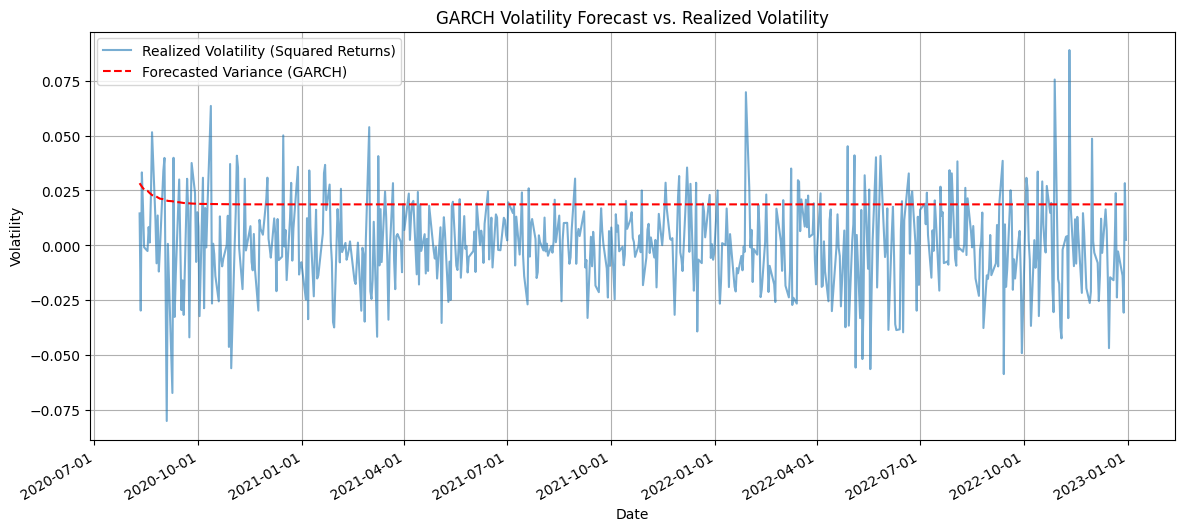

In [60]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14, 6))

# Plot realized volatility (squared returns)
plt.plot(test_squared_returns.index, test,
         label='Realized Volatility (Squared Returns)', alpha=0.6)

# Check index type and convert if needed
#if not isinstance(test_squared_returns.index, pd.DatetimeIndex):
    #forecast_var_df.index = pd.to_datetime(forecast_var_df.index)

# Use the datetime index directly with Matplotlib
plt.plot(test_squared_returns.index,forecast_volatility.values,  # No need for date2num
         label='Forecasted Variance (GARCH)', color='red', linestyle='--')

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

plt.title('GARCH Volatility Forecast vs. Realized Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

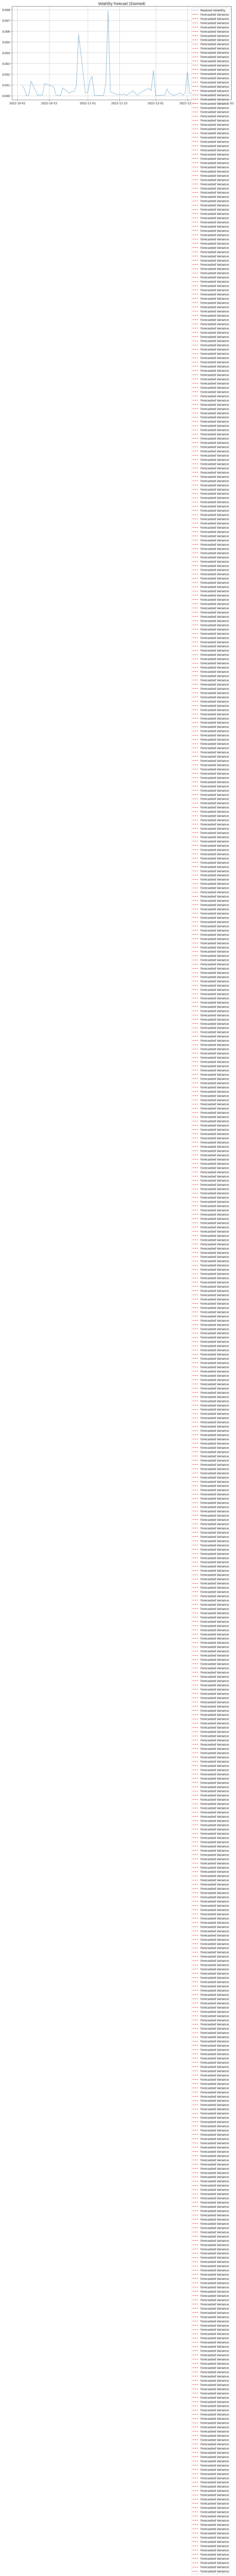

In [39]:
start_date = '2022-10-01'
end_date = '2023-01-01'

plt.figure(figsize=(14, 6))
plt.plot(test_squared_returns[start_date:end_date].index,
         test_squared_returns[start_date:end_date],
         label='Realized Volatility', alpha=0.6)
plt.plot(forecast_var[start_date:end_date].index,
         forecast_var[start_date:end_date],
         label='Forecasted Variance', color='red', linestyle='--')
plt.title('Volatility Forecast (Zoomed)')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
import arch

candidates = [1, 2, 3, 4]
results = []

# Fit models and store results
for p in candidates:
    model = arch.arch_model(train, vol='ARCH', p=1)  # Call arch_model from the arch module
    model_fit = model.fit(update_freq=0, disp='off')  # Silence output
    results.append({
        'p': p,
        'AIC': model_fit.aic,
        'BIC': model_fit.bic,
    })

# Create results DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values('AIC'))

   p          AIC          BIC
0  1 -7430.882891 -7415.130985
1  2 -7430.882891 -7415.130985
2  3 -7430.882891 -7415.130985
3  4 -7430.882891 -7415.130985


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003298. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003298. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarn

In [61]:
import arch
arch_model = arch.arch_model(train, mean='Constant', vol='ARCH', p=1)
arch_fit = arch_model.fit(update_freq=5)
print(arch_fit.summary())

Iteration:      5,   Func. Count:     39,   Neg. LLF: -3431.5228981330665
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3718.4414456144964
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 8
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                3718.44
Distribution:                  Normal   AIC:                          -7430.88
Method:            Maximum Likelihood   BIC:                          -7415.13
                                        No. Observations:                 1409
Date:                Wed, Apr 23 2025   Df Residuals:                     1408
Time:                        17:08:22   Df Model:                            1
      

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003298. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
